<a href="https://colab.research.google.com/github/dpostolovski/eeg_is/blob/master/IS_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [26]:
%matplotlib inline
import numpy as np
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd

mat = loadmat('drive/My Drive/Интелигентни Системи/Data/testData.mat')  # load mat-file
mdata = mat['testData']  # variable in mat file
#mdata[0]
mdata[0][0][0]
type(mdata)

In [9]:
from scipy import io
v = io.loadmat('drive/My Drive/Интелигентни Системи/Data/trainData.mat')
t = v['trainData']
t

array([[[  8.08706284, -16.71257019,   7.8597436 , ..., -11.1434803 ,
           3.95746899, -15.10719967],
        [  6.76504564, -15.2530756 ,  10.06130505, ...,  -6.34740496,
           1.70291674,  -8.84944153],
        [  4.62190819, -12.77494717,  11.40914917, ...,   0.74927485,
           1.0899899 ,  -3.46411967],
        ...,
        [  3.874053  , -12.0729351 ,  -0.56718701, ...,  15.91387749,
           6.46416283,   5.90037537],
        [  3.08422136,  -9.33540726,  -1.24253559, ...,  14.82288074,
           3.97303438,   5.84503984],
        [  3.30105615,  -7.53180122,  -1.83066773, ...,  12.61734867,
          -0.58443993,   5.53825998]],

       [[  6.06089401, -22.61998558,   7.22677517, ..., -13.44507122,
           5.00436783, -15.51527119],
        [  2.02015543, -19.652071  ,   9.02694702, ..., -10.58688927,
           0.93253976,  -5.46954966],
        [ -2.47141743, -15.64226341,   9.52622223, ...,  -5.40808058,
          -1.94308746,   3.10854244],
        ...,


In [0]:
!pip install -U -q scipy

In [17]:
!pip install mne


     |████████████████████████████████| 6.6MB 3.8MB/s 


In [0]:
import mne


In [78]:
ch_names = ["C3", "Cz", "C4", "CPz", "P3", "Pz", "P4", "POz"]

info = mne.create_info(ch_names=ch_names, sfreq=250, ch_types=['eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg'])

mdata_test = mdata

raw = mne.epochs.EpochsArray(np.swapaxes(mdata_test,0,1),info)

350 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


350 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


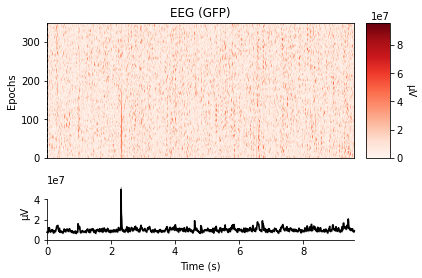

    Using multitaper spectrum estimation with 7 DPSS windows


<ipython-input-79-4ccf3138fe33>:2: RuntimeWarning:

Channel locations not available. Disabling spatial colors.



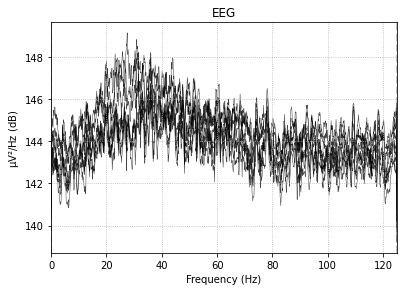

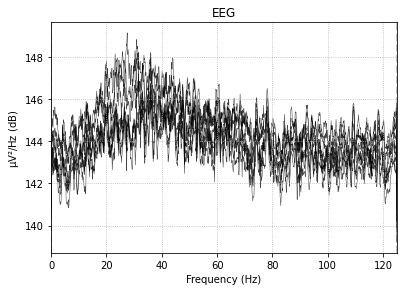

In [79]:
raw.plot_image()
raw.plot_psd()

Creating RawArray with float64 data, n_channels=8, n_times=2400
    Range : 0 ... 2399 =      0.000 ...     9.596 secs
Ready.
Effective window size : 8.192 (s)


<ipython-input-84-d9a15c1d404d>:4: RuntimeWarning:

Channel locations not available. Disabling spatial colors.



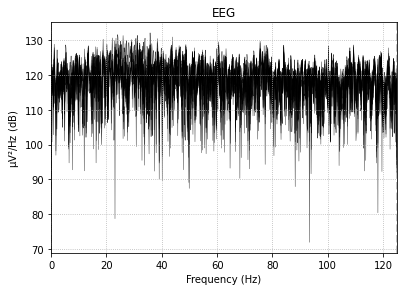

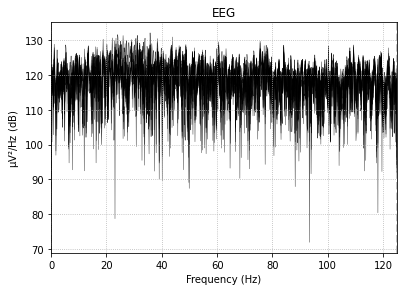

In [84]:
epoch_1 = np.swapaxes(mdata_test,0,1)[1]
epoch_1.shape
raw = mne.io.RawArray(epoch_1,info)
raw.plot_psd()

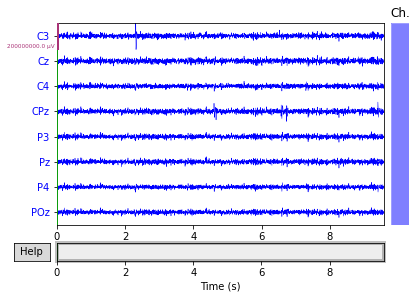

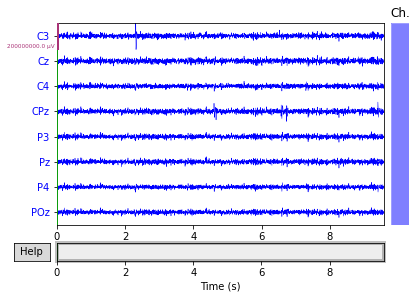

In [101]:
col =dict(mag='darkblue', grad='b', eeg='blue', eog='k', ecg='m',
     emg='k', ref_meg='steelblue', misc='k', stim='k',
     resp='k', chpi='k')
scal = dict(mag=1e-12, grad=4e-11, eeg=100, eog=150e-6, ecg=5e-4,
     emg=1e-3, ref_meg=1e-12, misc=1e-3, stim=1,
     resp=1, chpi=1e-4, whitened=1e2)

raw.plot(n_channels=8, scalings=scal, title='Data from arrays',
         show=True, block=True, color = col)

